In [1]:
# If you want to run this on Google Colab, just uncomment the following lines. Please note,
# that you will need to locate your folder directly in the root directory of your Google Drive (/content/drive/My Drive/).
# Because otherwise, it won't work out of the box and you would need to adjust the path in here.
#
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#
#import os
#os.chdir("/content/drive/My Drive/CSMP-Project")

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn

import tensorflow as tf

from tensorflow import keras
from keras import layers

In [61]:
data_file = '../../../data/newNorm.csv'

column_names = ['normRMSH', 'normCurv', 'gammaNorm', 'muT', 'normPullOff']

dataset = pd.read_csv(data_file, sep=';')
dataset = dataset.drop(dataset[dataset['normPullOff'] > 2e-3].index) #* 1_000_000

dataset

,normRMSH,normCurv,gammaNorm,muT,normPullOff
1,0.149189,8.53679,0.099375,0.596627,0.000039
2,0.060246,93.13430,0.001107,0.314256,0.000133
4,0.072831,48.90650,0.023706,0.334582,0.000205
5,0.226675,5.08463,0.022891,1.093210,0.000155
6,0.072613,48.89090,0.030714,0.368404,0.000189
...,...,...,...,...,...
291,0.053112,135.62600,0.015947,0.256966,0.000609
293,0.085864,25.51930,0.053388,0.217838,0.001356
294,0.056461,114.94100,0.160628,0.230031,0.000921
296,0.223971,5.13797,0.033074,3.308260,0.000016


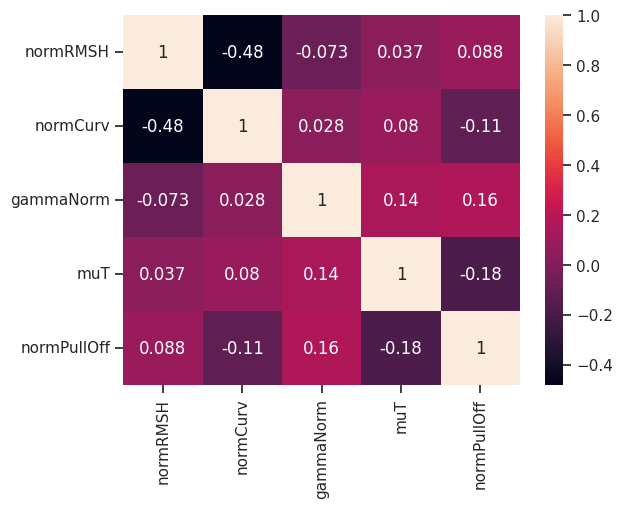

In [62]:
dataplot = sns.heatmap(dataset.corr(), cmap="rocket", annot=True)

plt.show()

In [63]:
dataset.describe()

,normRMSH,normCurv,gammaNorm,muT,normPullOff
count,204.000000,204.000000,204.000000,204.000000,2.040000e+02
mean,0.103627,94.818514,0.099550,1.773787,4.734083e-04
std,0.055067,191.891684,0.126629,6.332052,4.698904e-04
min,0.031083,5.052030,0.000219,0.200971,2.130000e-09
25%,0.062645,10.699718,0.023672,0.305110,9.430000e-05
50%,0.089080,26.222150,0.055490,0.466661,3.036165e-04
75%,0.130935,82.107100,0.123053,0.956189,6.994865e-04
max,0.227925,1361.280000,1.041080,67.923700,1.921510e-03


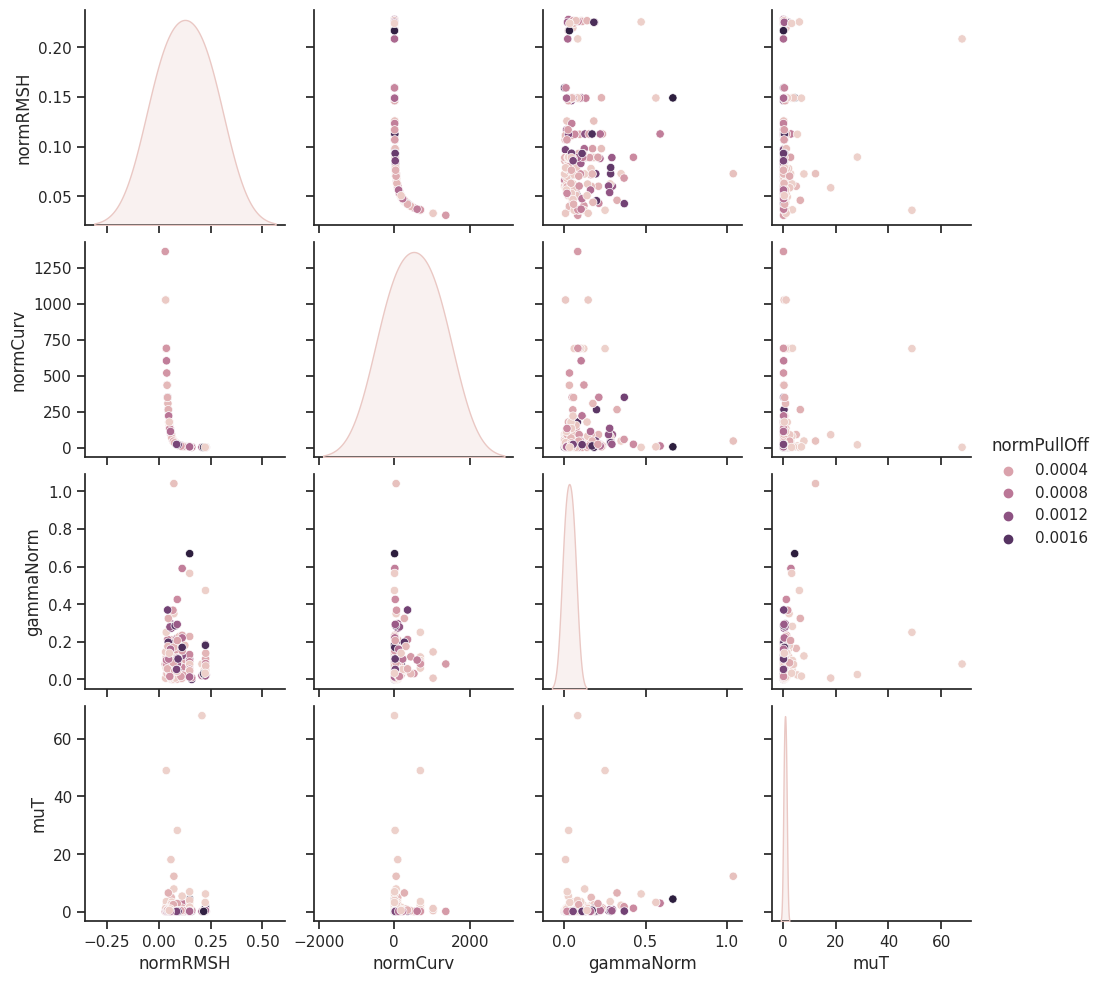

In [64]:
sns.set_theme(style="ticks")
sns.pairplot(dataset, hue='normPullOff')

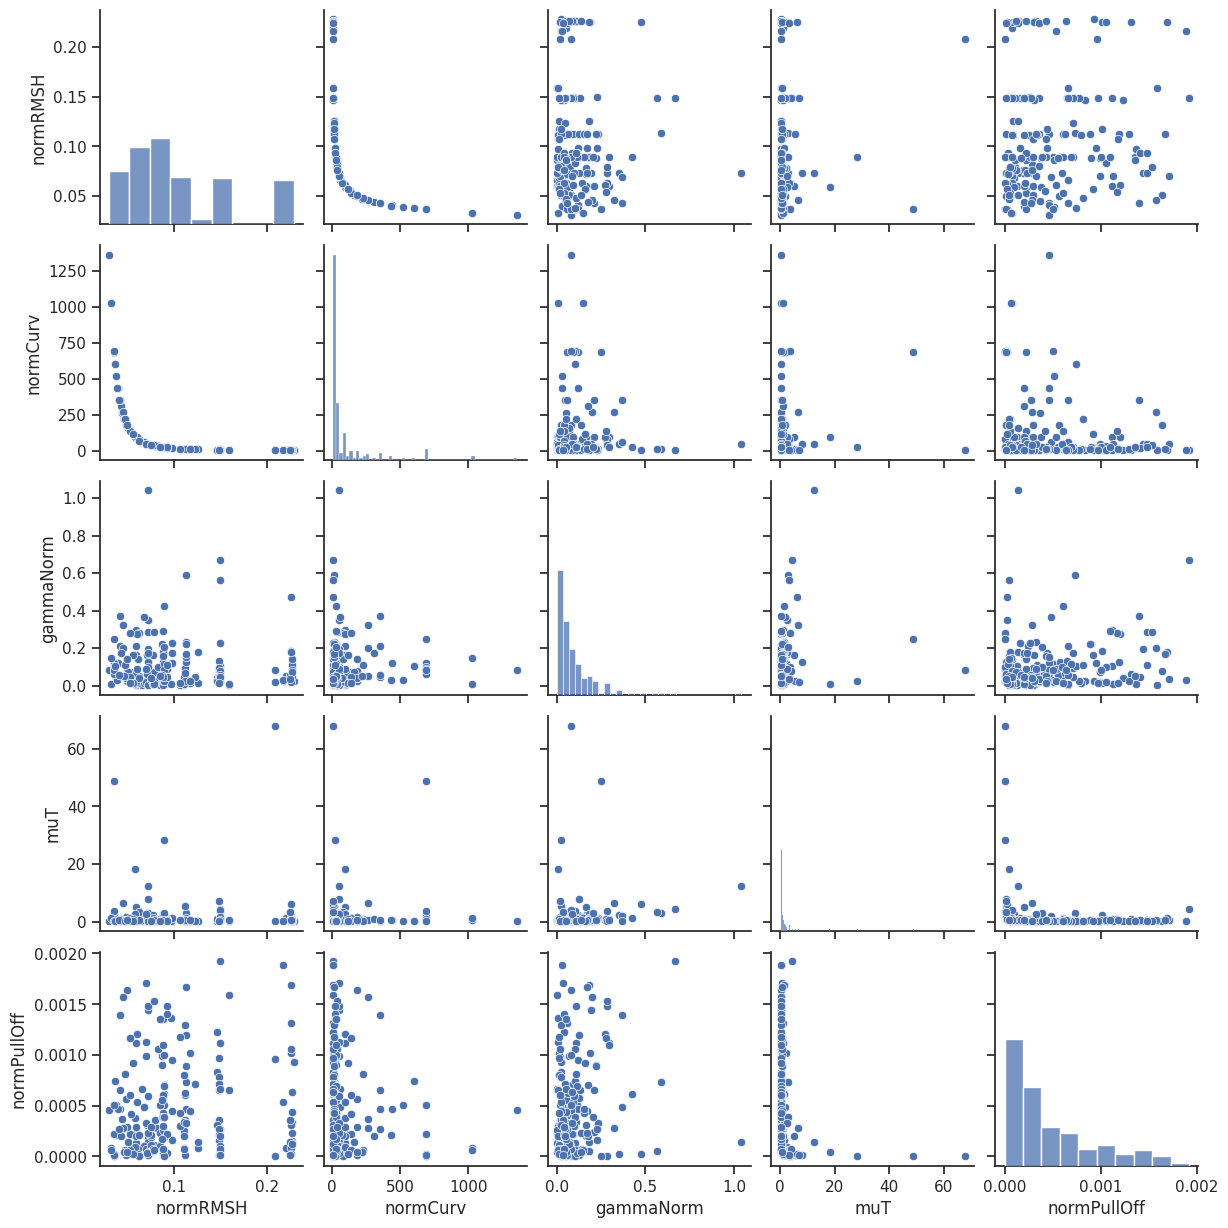

In [65]:
sns.set_theme(style="ticks")
sns.pairplot(dataset)

In [46]:
train_dataset = dataset.sample(frac=0.8)
test_dataset = dataset.drop(train_dataset.index)

len(train_dataset)

78

In [47]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('normPullOff')
test_labels = test_features.pop('normPullOff')

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState()

ada_regr = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=10), n_estimators=500, learning_rate=.2, random_state=rng
)

ada_regr.fit(train_dataset.drop(['normPullOff'], axis=1), train_labels)

preds = ada_regr.predict(test_dataset.drop(['normPullOff'], axis=1))

# The mean squared error
mse = mean_squared_error(test_dataset['normPullOff'], preds)
print("Mean squared error: %.10f" % mse)
# The RSME
print("Root Mean squared error: %.10f" % np.sqrt(mse))
# The mean absolute error
print("Mean absolute error: %.10f" % mean_absolute_error(test_dataset['normPullOff'], preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(test_dataset['normPullOff'], preds))

Mean squared error: 0.0064754283
Root Mean squared error: 0.0804700461
Mean absolute error: 0.0491114611
Coefficient of determination: 0.34069


In [49]:
from sklearn.ensemble import RandomForestRegressor

randForestReg = RandomForestRegressor(n_estimators=500, criterion="absolute_error")
randForestReg.fit(train_dataset.drop(['normPullOff'], axis=1), train_labels)

preds = randForestReg.predict(test_dataset.drop(['normPullOff'], axis=1))

# The mean squared error
mse = mean_squared_error(test_dataset['normPullOff'], preds)
print("Mean squared error: %.10f" % mse)
# The RSME
print("Root Mean squared error: %.10f" % np.sqrt(mse))
# The mean absolute error
print("Mean absolute error: %.10f" % mean_absolute_error(test_dataset['normPullOff'], preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(test_dataset['normPullOff'], preds))

Mean squared error: 0.0066254817
Root Mean squared error: 0.0813970619
Mean absolute error: 0.0490744834
Coefficient of determination: 0.32542


In [50]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=7)
knn_reg.fit(train_dataset.drop(['normPullOff'], axis=1), train_labels)

preds = knn_reg.predict(test_dataset.drop(['normPullOff'], axis=1))

# The mean squared error
mse = mean_squared_error(test_dataset['normPullOff'], preds)
print("Mean squared error: %.10f" % mse)
# The RSME
print("Root Mean squared error: %.10f" % np.sqrt(mse))
# The mean absolute error
print("Mean absolute error: %.10f" % mean_absolute_error(test_dataset['normPullOff'], preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(test_dataset['normPullOff'], preds))

Mean squared error: 0.0096134027
Root Mean squared error: 0.0980479612
Mean absolute error: 0.0660607761
Coefficient of determination: 0.02120


In [51]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
normRMSH,0.112710,0.054571
normCurv,46.272192,71.384725
gammaNorm,0.335425,0.312003
muT,0.428800,0.338073
normPullOff,0.044226,0.059105


In [52]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[ 0.11271024 46.272198    0.3354253   0.4287998 ]]


In [53]:
def loss(y_true, y_pred):
 # mse = keras.losses.mean_squared_error(y_true, y_pred)
  mae = keras.losses.mean_absolute_error(y_true, y_pred)
  return mae

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(128, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(128, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(1)
  ])

  model.compile(loss=loss,
                optimizer=tf.keras.optimizers.Adam(1e-2))
  return model

In [54]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 4)                9         
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 128)               640       
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_7 (Batc  (None, 128)             

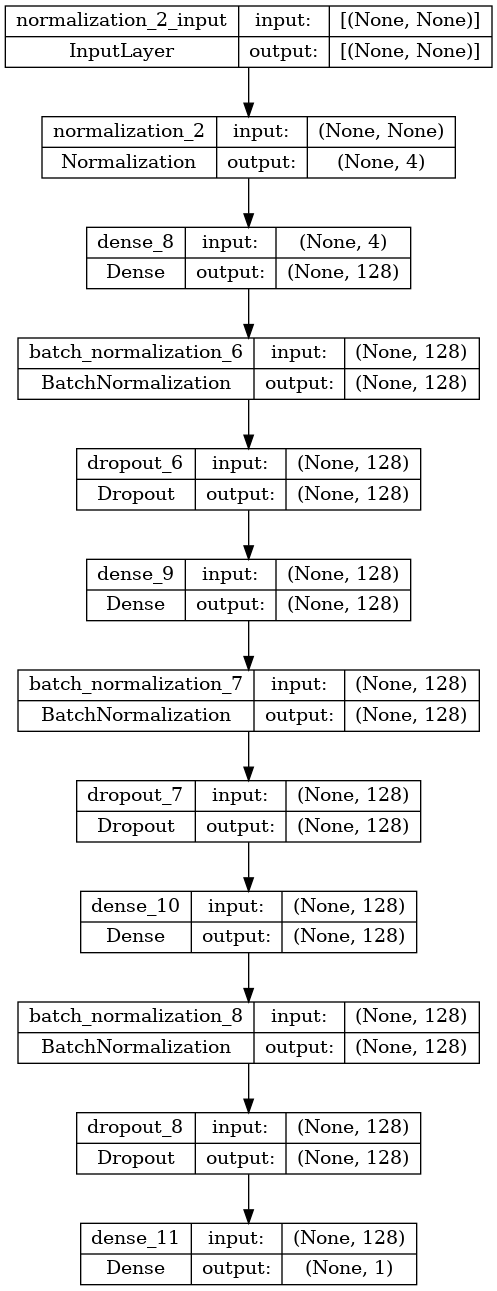

In [55]:
tf.keras.utils.plot_model(dnn_model, show_shapes=True)

In [56]:
batch_size = len(train_dataset) - (int) (len(train_dataset) * 0.2)

history = dnn_model.fit(
    train_features,
    train_labels,
    batch_size=batch_size,
    validation_split=0.2,
    epochs=2000)

Epoch 1/2000


/home/marc/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1/1 [==============================] - 2s 2s/step - loss: 1.4666 - val_loss: 0.1005
Epoch 2/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.4010 - val_loss: 0.1462
Epoch 3/2000
1/1 [==============================] - 0s 52ms/step - loss: 1.3898 - val_loss: 0.1210
Epoch 4/2000
1/1 [==============================] - 0s 55ms/step - loss: 1.1361 - val_loss: 0.1207
Epoch 5/2000
1/1 [==============================] - 0s 55ms/step - loss: 1.0505 - val_loss: 0.1221
Epoch 6/2000
1/1 [==============================] - 0s 55ms/step - loss: 1.1509 - val_loss: 0.1275
Epoch 7/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.1631 - val_loss: 0.1182
Epoch 8/2000
1/1 [==============================] - 0s 52ms/step - loss: 1.0405 - val_loss: 0.1416
Epoch 9/2000
1/1 [==============================] - 0s 53ms/step - loss: 0.8164 - val_loss: 0.1589
Epoch 10/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.0972 - val_loss: 0.1618
Epoch 11/2000
1/1 [=====

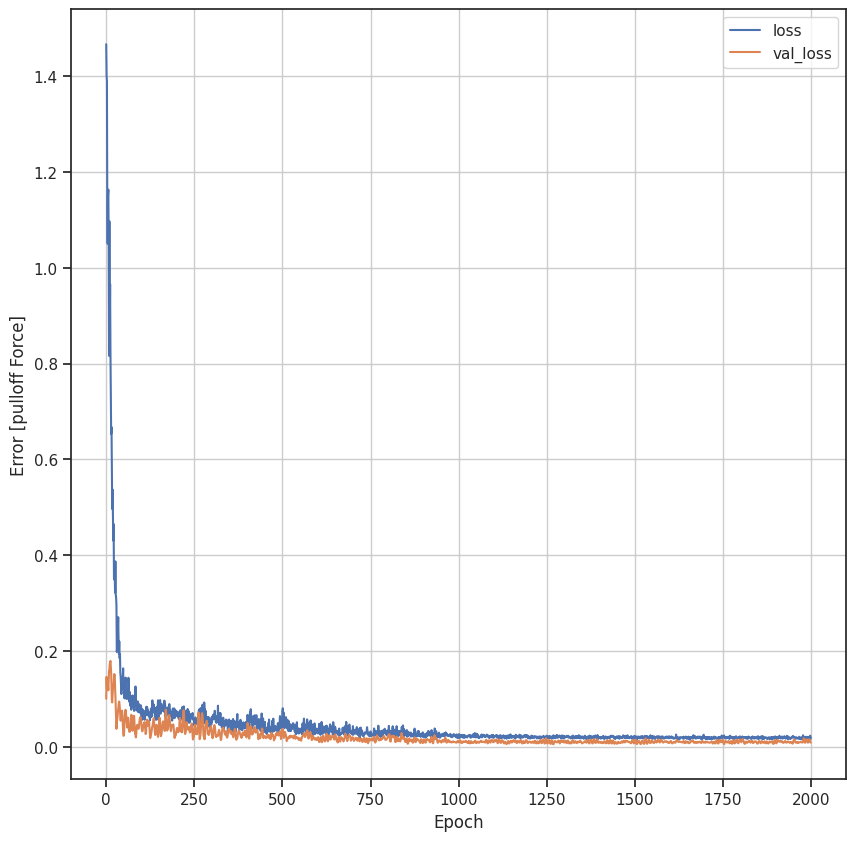

In [57]:
def plot_loss(history):
  plt.figure(figsize=(10,10))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [pulloff Force]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

1/1 [==============================] - 0s 131ms/step


[]

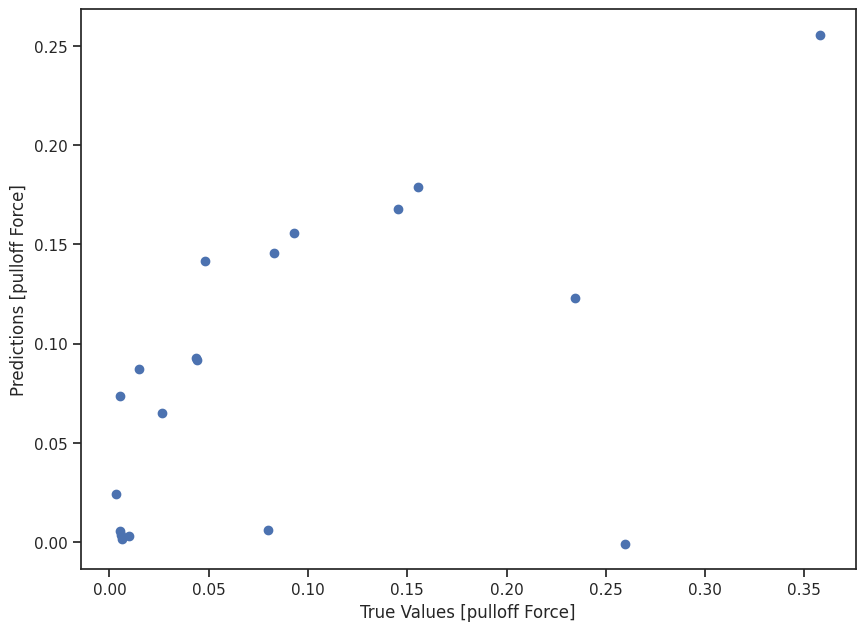

In [58]:
test_predictions = dnn_model.predict(test_features).flatten()

plt.figure(figsize=(10,10))
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [pulloff Force]')
plt.ylabel('Predictions [pulloff Force]')
plt.plot()

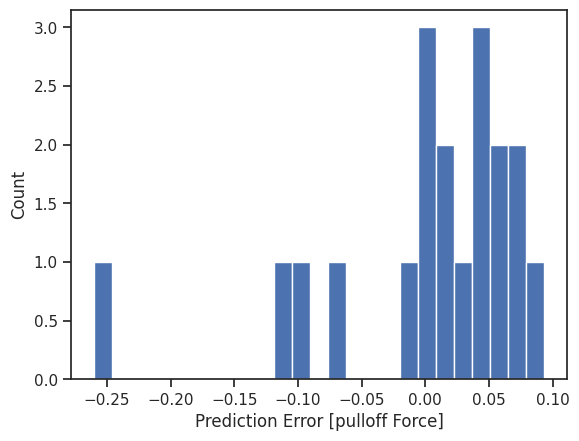

In [59]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [pulloff Force]')
_ = plt.ylabel('Count')

In [60]:
test_rmse = tf.math.sqrt(keras.losses.mean_squared_error(test_labels, test_predictions))
test_rmse.numpy()

0.08286877

In [21]:
dnn_model.save('norm_dnn_model')

INFO:tensorflow:Assets written to: norm_dnn_model/assets


INFO:tensorflow:Assets written to: norm_dnn_model/assets
